In [3]:
import gym_minigrid
print(gym_minigrid.__file__)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LogNorm, Normalize
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
from io import StringIO


import pickle as pkl
import gzip
import os
from io import StringIO
import pandas as pd

import gym_minigrid
print(gym_minigrid.__file__)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LogNorm, Normalize
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
from io import StringIO
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

import pickle as pkl
import gzip
import os
from io import StringIO
import pandas as pd

import gzip
import pickle as pkl
import pandas as pd
import seaborn as sns; sns.set_theme()
import numpy as np
# 
import matplotlib.ticker as tkr

formatter = tkr.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-2, 2))

np.set_printoptions(suppress=True)

def nans(carte):
    for i in [0,1]:
        for j in [2,3,4,5,6,7]:
            carte[i,j] = np.nan
    return carte

/home/mheuillet/anaconda3/lib/python3.9/site-packages/gym_minigrid/__init__.py
/home/mheuillet/anaconda3/lib/python3.9/site-packages/gym_minigrid/__init__.py


FileNotFoundError: [Errno 2] No such file or directory: 'deterministic_traj/task=LavaGrid-old--lr=0.0005--alpha=1.0--hidden_sizes=[64, 64]--seed=0/trajs.npy'

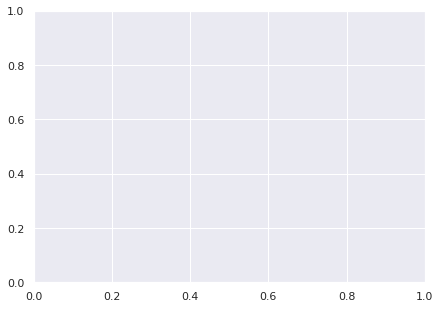

In [44]:
path = "deterministic_traj"
alphas = [1.0, 0.04, 0.01]
width = 12 - 2
height = 9 - 2
n_seeds = 10
postfix1 = 'task=LavaGrid-old--lr=0.0005--alpha='
postfix2 = '--hidden_sizes=[64, 64]--seed='
eps = 0.009

for idx, alpha in enumerate(alphas):
    fig, axn = plt.subplots( nrows=1, ncols=1, figsize=(7,5))
    grid = np.zeros((height, width))

    for seed in range(n_seeds):
        grid_seed = np.zeros_like(grid)
        trajs_path = os.path.join(path, postfix1 + str(alpha) + postfix2 + str(seed), "trajs.npy")
        traj = np.load(trajs_path)

        for x, y in traj:
            x, y = int(x), int(y)
            grid_seed[y, x] = 1 # Have to use (y, x) because matplotlib has different axis convention
        
        grid += grid_seed

    grid /= n_seeds
    grid = nans(grid)

    annotations = np.zeros((height, width), dtype=str)
    annotations[0, 9] = 'G'
    annotations[0, 0] = 'S'
                
    a = sns.heatmap( grid , linewidths=.5,  cmap="YlGnBu",  annot=annotations, ax=axn, fmt="s", linecolor="white", annot_kws={"fontsize":15, "fontweight": "bold"})
    a.set_ylim(height + eps, -eps)
    a.set_xlim(-eps, width + eps)
    a.set_facecolor('xkcd:salmon')
    a.set(xticklabels=[], yticklabels=[]) 
    
    plt.savefig(f"iqn_alpha={alpha}.pdf", format="pdf", dpi=1200)
    plt.show()
    plt.close()

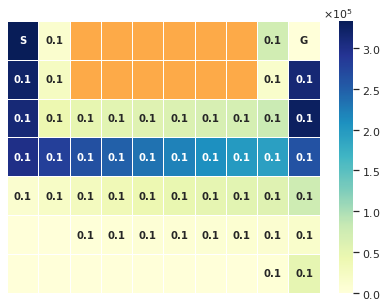

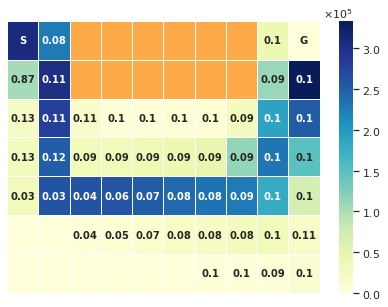

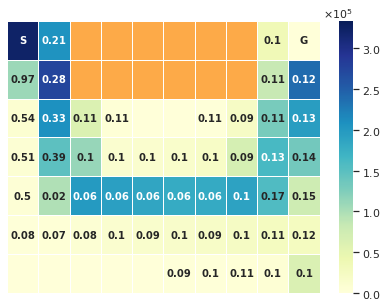

In [50]:
budgets = [1, 25, 100]
maxes = []
width = 12 - 2
height = 9 - 2
stoch = 0.1
path = '/home/mheuillet/Desktop/CvarAdversarialRL-main/results'

for idx, budget in enumerate(budgets):
    
    fig, axn = plt.subplots( nrows=1, ncols=1, figsize=(7,5), sharex = True, sharey = True )

    try:

        if idx in[0, 3]:
    
            with gzip.open( os.path.join(path, 'empirical_experiment2_1_{}_0.7_1_{}_5m_300000_{}.pkl.gz'.format(stoch,stoch, budget)  )  ,'rb') as f:
                map1 = pkl.load(f)
                map2 = pkl.load(f)
                map3 = pkl.load(f)
                #map4 = pkl.load(f)
        
            map1 = np.zeros(map1.shape) 
            map1.fill(0.1)
    
        else:
            with gzip.open( os.path.join(path, 'empirical_experiment3_{}_{}_0.7_1_{}_5m_300000_{}.pkl.gz'.format(budget,stoch,stoch,budget ) )  ,'rb') as f:
                map1 = pkl.load(f)
                map2 = pkl.load(f)
                map3 = pkl.load(f)
                #map4 = pkl.load(f)
            
    except FileNotFoundError:
        map1 = np.zeros((width, height))
        map2 = np.zeros((width, height)).T
        map3 = np.zeros((width, height)).T
        map4 = np.zeros((width, height)).T

    maxes.append(np.max(map3))
    annotations = pd.DataFrame( np.round( map1.T, 2)  )
    annotations = annotations.where( map3>1500 , '')
    annotations = annotations.replace(0,"")
    annotations = annotations.astype(str)  
    annotations.loc[0,9] = 'G'
    annotations.loc[0,0] = 'S'
        
    if idx in [0,1,2]:
        
        temp = nans(map3)
        a = sns.heatmap( temp , linewidths=.5,  cmap="YlGnBu",  annot=annotations,cbar_kws={"format": formatter}, ax=axn, fmt="s", linecolor="white", annot_kws={"fontsize":10, "fontweight": "bold"}, vmin = 0, vmax = max(maxes) )
        a.set_facecolor('#fdaa48')
        a.set(xticklabels=[], yticklabels=[]) 


    fig.savefig('/home/mheuillet/Desktop/final_figures/adversary_{}_{}.pdf'.format(stoch,idx), bbox_inches='tight',format="pdf", dpi=1200)

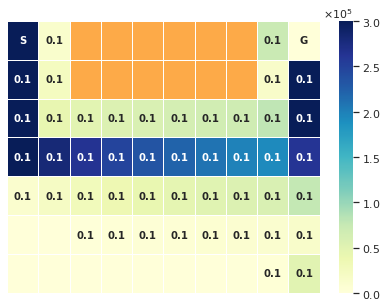

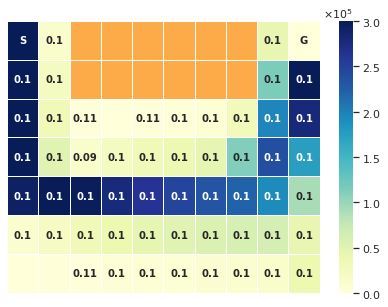

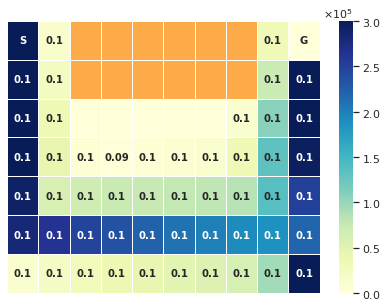

In [51]:
budgets = [1, 25, 100]
maxes = []
width = 12 - 2
height = 9 - 2
stoch = 0.1
path = '/home/mheuillet/Desktop/CvarAdversarialRL-main/results'

for idx, budget in enumerate(budgets):
    
    fig, axn = plt.subplots( nrows=1, ncols=1, figsize=(7,5), sharex = True, sharey = True )

    try:

        if idx in[0, 3]:
    
            with gzip.open( os.path.join(path, 'empirical_experiment2_1_{}_0.7_1_{}_5m_300000_1.pkl.gz'.format(stoch,stoch)  )  ,'rb') as f:
                map1 = pkl.load(f)
                map2 = pkl.load(f)
                map3 = pkl.load(f)
                #map4 = pkl.load(f)
        
            map1 = np.zeros(map1.shape) 
            map1.fill(0.1)
    
        else:
            with gzip.open( os.path.join(path, 'empirical_experiment3_{}_{}_0.7_1_{}_5m_300000_1.pkl.gz'.format(budget,stoch,stoch ) )  ,'rb') as f:
                map1 = pkl.load(f)
                map2 = pkl.load(f)
                map3 = pkl.load(f)
                #map4 = pkl.load(f)
            
    except FileNotFoundError:
        map1 = np.zeros((width, height))
        map2 = np.zeros((width, height)).T
        map3 = np.zeros((width, height)).T
        map4 = np.zeros((width, height)).T

    maxes.append(np.max(map3))
    annotations = pd.DataFrame( np.round( map1.T, 2)  )
    annotations = annotations.where( map3>1500 , '')
    annotations = annotations.replace(0,".")
    annotations = annotations.astype(str)  
    annotations.loc[0,9] = 'G'
    annotations.loc[0,0] = 'S'
        
    if idx in [0,1,2]:
        
        temp = nans(map3)
        a = sns.heatmap( temp , linewidths=.5,  cmap="YlGnBu",  annot=annotations, linecolor="white", annot_kws={"fontsize":10, "fontweight": "bold"}, fmt="s",cbar_kws={"format": formatter}, vmin = 0, vmax = 300000 )
        a.set_facecolor('#fdaa48')
        a.set(xticklabels=[], yticklabels=[]) 


    fig.savefig('/home/mheuillet/Desktop/final_figures/noadversary_{}_{}.pdf'.format(stoch,idx), bbox_inches='tight',format="pdf", dpi=1200)

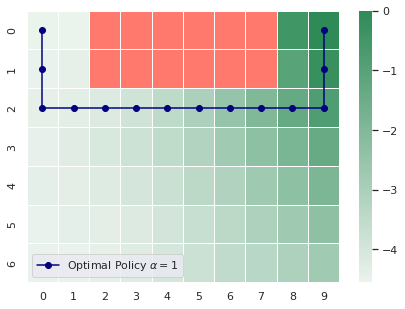

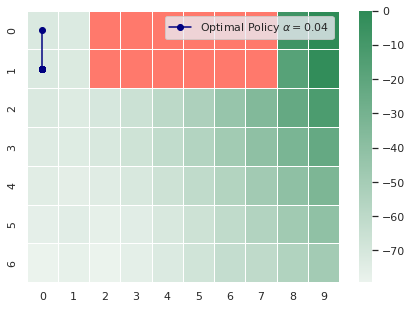

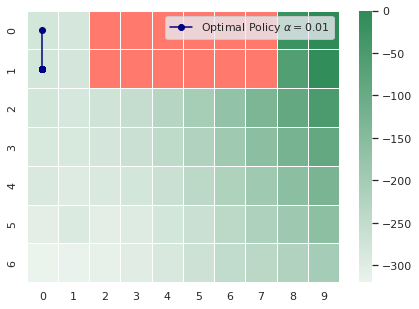

In [15]:
stochasticity = 0.1
seed = 8
alpha = 1
maximum = []
minimum = []
for i in [1,0.04,0.01]:

    fig, axn = plt.subplots( nrows=1, ncols=1, figsize=(7,5), sharex = True, sharey = True )
    
    map = pkl.load(  open('/home/mheuillet/Desktop/CVAR-QLEARNING/Qmap_{}_{}_{}.pkl'.format(i, stochasticity, seed), 'rb') )
    path = np.array( pkl.load(  open('/home/mheuillet/Desktop/CVAR-QLEARNING/Qpath_{}_{}_{}.pkl'.format(i, stochasticity,seed), 'rb') ) )
    maximum.append( np.max(map) )
    minimum.append( np.min(map) )
    
#     with np.printoptions(precision=2, suppress=True, formatter={'float': '{:0.2f}'.format}, linewidth=100):
#         print(np.round(map,2))
#         print()
    
    annotations = pd.DataFrame( np.round( map, 2)  )
    annotations = annotations.replace(0,".")
    annotations = annotations.astype(str)  
    annotations.loc[0,9] = 'G'
    annotations.loc[0,0] = 'S'

    a = sns.heatmap( nans( map) , linewidths=.5,  cmap=sns.light_palette("seagreen", as_cmap=True),  fmt="s",annot_kws={"fontsize":10}, vmin = min(minimum), vmax = max(maximum) ) #annot=annotations,
    a.set_facecolor('xkcd:salmon') 
    a.plot( path[0] + 0.5, path[1] + 0.5, 'o-', color='navy', label=r'Optimal Policy $\alpha = {}$'.format(i))
    a.legend()
#     fig.savefig('/home/mheuillet/Desktop/CVAR_optimal_DP_{}_{}.png'.format(i, stochasticity), bbox_inches='tight')

In [141]:

def show_trajectory(budget, seed):

    path = 'cherry_pick_experiment3_{}_0.05_0.7_1_0.05_{}.pkl.gz'.format(budget, seed)
        
    with gzip.open(os.path.join('/home/mheuillet/Desktop/CvarAdversarialRL-main/results', path),"rb") as f:
        position_history = pkl.load(f)
        transition_history = pkl.load(f)
        adversary_history = pkl.load(f)
        budget_history = pkl.load(f)
        action_history = pkl.load(f)
               
    position_history = np.array([ i.cpu().numpy()[0] for i in position_history] )
    transition_history = np.array([ np.round(i.cpu().numpy()[0],2) for i in transition_history],dtype=np.float32) #
    adversary_history = np.array([ np.round(i.cpu().numpy()[0],2) for i in adversary_history],dtype=np.float32)
    budget_history = np.array([ np.round(i.cpu().numpy()[0],2) for i in budget_history],dtype=np.float32)
    action_history = np.array([ i.cpu().numpy()[0] for i in action_history],dtype=int)
    position_history = position_history -1 +0.5
    action_dict = {0:'⬆',1:'⬇',2:'➡',3:'⬅'}

    for i in range( len(position_history) ): 
    
        fig1, ax = plt.subplots()
        
        ax.plot( position_history[:,0][:i+1], position_history[:,1][:i+1], '-', color='navy', label='Agent trajectory'.format(i))
        ax.plot(position_history[:,0][i],position_history[:,1][i],'ro', label='Agent position') 
        
        p1,p2,p3,p4 = transition_history[i]
        ap1,ap2,ap3,ap4  = adversary_history[i]
        budg1 = budget_history[i][0]
        try:
            budg2 = budget_history[i+1][0]
        except:
            budg2 = 1
           
        p1 = str(p1)[:4] if len(str(p1))==4 else str(p1)+'0'[:4]
        p2 = str(p2)[:4] if len(str(p2))==4 else str(p2)+'0'[:4]
        p3 = str(p3)[:4] if len(str(p3))==4 else str(p3)+'0'[:4]
        p4 = str(p4)[:4] if len(str(p4))==4 else str(p4)+'0'[:4]
        
        ap1 = str(ap1)[:4] if len(str(ap1))==4 else str(ap1)+'0'[:4]
        ap2 = str(ap2)[:4] if len(str(ap2))==4 else str(ap2)+'0'[:4]
        ap3 = str(ap3)[:4] if len(str(ap3))==4 else str(ap3)+'0'[:4]
        ap4 = str(ap4)[:4] if len(str(ap4))==4 else str(ap4)+'0'[:4]
    
        ax.plot([], [], ' ', label="Natural transition: ⬆{} ⬇{} ➡{} ⬅{}".format( str(p1),str(p2),str(p3),str(p4) ) )
        ax.plot([], [], ' ', label="Adversarial trans: ⬆{} ⬇{} ➡{} ⬅{}".format( str(ap1),str(ap2),str(ap3),str(ap4) ) )
        
        if (position_history[i] == [8.5,0.5]).all() and action_history[i] == 2:
            ax.plot([], [], ' ', label="Selected action : {} - Goal reached!".format( action_dict[ action_history[i] ] ) )
        elif (position_history[i] == [9.5,1.5]).all() and action_history[i] == 0:
            ax.plot([], [], ' ', label="Selected action : {} - Goal reached!".format( action_dict[ action_history[i] ] ) )
        else:
            ax.plot([], [], ' ', label="Selected action : {}".format( action_dict[ action_history[i] ] ) )
    
        ax.plot([], [], ' ', label="Adversarial budg: {} to {}".format( str(budg1),str(budg2) ) )
        
        ax.text( 0.1, 0.6, 'S')
        ax.text( 9.4, 0.6, 'G')
        plt.ylim((7,0))
        plt.xlim((0,10))
        plt.yticks(np.arange(0, 7, 1.0),['']*7 )
        plt.xticks(np.arange(0, 10, 1.0), ['']*10)
        
    
        # Create a Rectangle patch
        rect = mpatches.Rectangle( (2,0),6,2, linewidth=1,color='xkcd:salmon')
        ax.add_patch(rect)
    
        ax.grid(which='major',visible=True, color='white', linestyle='-', linewidth=3.3)
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()
        
        fig1.savefig('/home/mheuillet/Desktop/trajectories/traj_{}_{}_{}.png'.format(budget,seed,i), bbox_inches='tight')

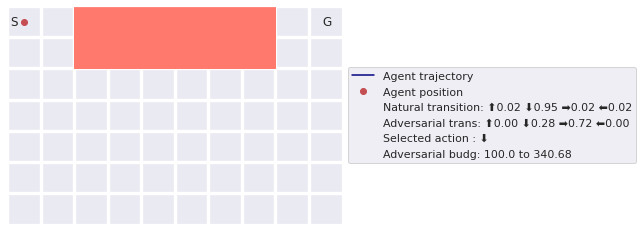

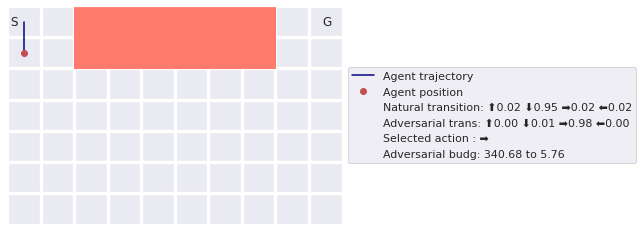

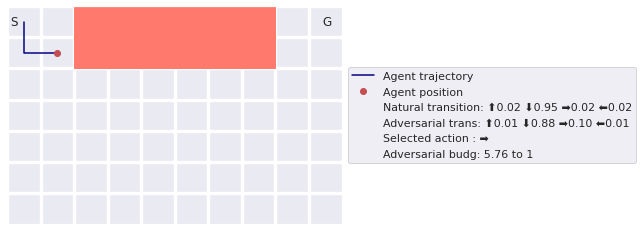

In [142]:
budget = 100
seed = 2
show_trajectory(budget, seed)

In [107]:
import matplotlib.cm as cm

def show_adversary(seed,budget):

    path = 'cherry_pick_experiment3_{}_0.1_0.7_1_0.1_{}.pkl.gz'.format(budget, seed)
    
    with gzip.open(os.path.join('/home/mheuillet/Desktop/CvarAdversarialRL-main/results', path),"rb") as f:
        position_history = pkl.load(f)
        transition_history = pkl.load(f)
        adversary_history = pkl.load(f)
        budget_history = pkl.load(f)
        action_history = pkl.load(f)

    position_history = np.array([ i.cpu().numpy()[0] for i in position_history] )
    transition_history = np.array([ np.round(i.cpu().numpy()[0],2) for i in transition_history],dtype=np.float32) #
    adversary_history = np.array([ np.round(i.cpu().numpy()[0],2) for i in adversary_history],dtype=np.float32)
    budget_history = np.array([ np.round(i.cpu().numpy()[0],2) for i in budget_history],dtype=np.float32)
    action_history = np.array([ i.cpu().numpy()[0] for i in action_history],dtype=int)
    position_history = position_history -1 +0.5

    fig, ax = plt.subplots()

    reds = cm.get_cmap('Reds', 5) 
    blues = cm.get_cmap('Blues', 5) 
    
    for idx,coord in enumerate(position_history): 
        
        colors = ['black']*4
        
        for act in [0,1,2,3]:
            result = transition_history[idx][act] - adversary_history[idx][ act ]
            if result<0.05 and result>0:
                colors[ act ] = 'lightsteelblue'
            elif result<0.3 and result>0.05:
                colors[ act ] = 'royalblue'
            elif result>0.3:
                colors[ act ] = 'blue'
           
            elif result> -0.05 and result<0:
                colors[ act ] = 'lightcoral'
            elif result > -0.3 and result<-0.05:
                colors[ act ] = 'firebrick'
            elif result<-0.3:
                colors[ act ] = 'red'
            
            
        #haut 
        plt.arrow(coord[0], coord[1], 0, -0.25, width = 0.05 , head_width = 0.2 , head_length = 0.25 , color=colors[0])
        # bas
        plt.arrow(coord[0], coord[1], 0, 0.25, width = 0.05  , head_width = 0.2 , head_length = 0.25 , color=colors[1])
        #droite
        plt.arrow(coord[0], coord[1], 0.25, 0, width = 0.05 , head_width = 0.2, head_length = 0.25, color=colors[2])
        #gauche
        plt.arrow(coord[0], coord[1], -0.25, 0, width = 0.05 , head_width = 0.2, head_length = 0.25, color=colors[3])

        
    # Create a Rectangle patch fig.set_facecolor('#fdaa48') 
    rect = mpatches.Rectangle( (2,0),6,2, linewidth=1,color='#fdaa48')
    ax.add_patch(rect)

    plt.ylim((7,0))
    plt.xlim((0,10))
    plt.yticks(np.arange(0, 7, 1.0),['']*7 )
    plt.xticks(np.arange(0, 10, 1.0), ['']*10 )

    
    for i in [1,2,3,4,5,6]:
        plt.axhline(y=i,color = 'white', linewidth=1)
    for i in [1,2,3,4,5,6,7,8,9]:
        plt.axvline(x =i, color = 'white', linewidth=1)
    from matplotlib.patches import Patch
    
    patch1 = Patch(facecolor='red', edgecolor='red', label=r"Pbt. decrease $\geq 0.3$")
    patch2 = Patch(facecolor='firebrick', edgecolor='firebrick', label=r"Pbt. decrease $\in [0.05, 0.3]$")
    patch3 = Patch(facecolor='lightcoral', edgecolor='lightcoral', label=r"Pbt. decrease $\in [0, 0.05]$")
    patch4 = Patch(facecolor='blue', edgecolor='blue', label=r"Increase $\geq 0.3$")
    patch5 = Patch(facecolor='royalblue', edgecolor='royalblue', label=r"Increase $\in [0.05,0.3]$")
    patch6 = Patch(facecolor='lightsteelblue', edgecolor='lightsteelblue', label=r"Increase $\in[0,0.05]$")
    patch8 = Patch(facecolor='green', edgecolor='green', label='.', alpha = 0)
    patch7 = Patch(facecolor='black', edgecolor='black', label="No change")
    lgd = ax.legend(handles=[patch3,patch2,patch1,patch6,patch5,patch4,patch7, patch8], 
                    prop={'size': 7}, loc = 3, ncol = 3, bbox_to_anchor=[0.03, 0] )
    

    
    ax.set_facecolor( '#FEFED9' ) 
    
    fig.savefig('/home/mheuillet/Desktop/final_figures/example_{}_{}.pdf'.format(seed,budget),format="pdf", dpi=1200, bbox_inches='tight')
    
    return True


True

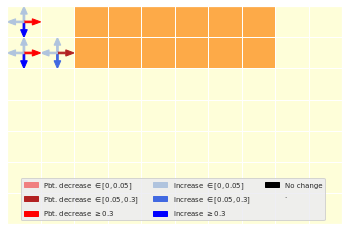

In [110]:
show_adversary(2,100)

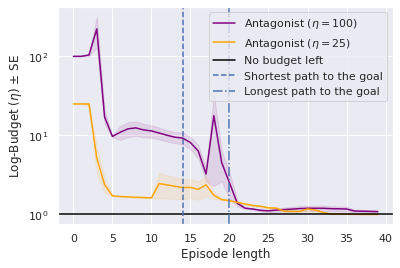

In [4]:
color = ['purple', 'orange']

for idx,budget in enumerate([100,25]):

    path = 'evolution_budget_{}.pkl.gz'.format(budget)

    with gzip.open(os.path.join('/home/mheuillet/Desktop/codebase/results', path),"rb") as f:
        budget_step = pkl.load(f)
        steps = pkl.load(f)

    a = 0.1
    mean = [ np.mean(budget_step[i]) for i in range(40) ]
    std = [ np.std(budget_step[i]) for i in range(40) ]
    plt.plot( range(40), mean, color=color[idx], label = r'Antagonist ($\eta={}$)'.format(budget) )
    plt.fill_between( range(40), mean - std / np.sqrt(steps), mean + std / np.sqrt(steps), alpha=a, color = color[idx])

plt.yscale('log')
plt.axhline(y=1, label = 'No budget left', color = 'black')
plt.axvline(x = 14, linestyle='dashed', label = 'Shortest path to the goal')
plt.axvline(x= 20, linestyle='dashdot', label = 'Longest path to the goal')
plt.legend()
plt.ylabel(r'Log-Budget ($\eta$) ± SE')
plt.xlabel('Episode length')
plt.savefig('/home/mheuillet/Desktop/final_figures/evolution_budget.pdf', facecolor='white', transparent=True,format="pdf", dpi=1200, bbox_inches='tight')

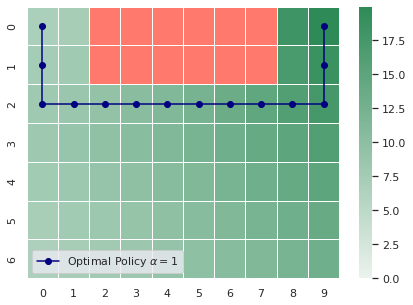

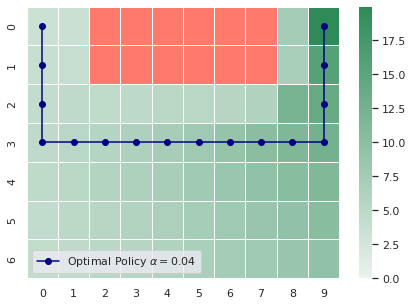

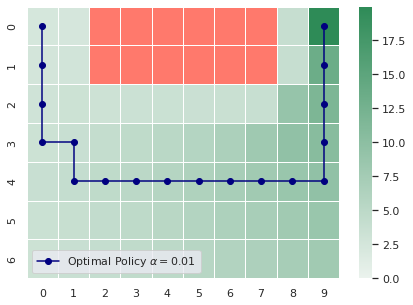

In [128]:
stochasticity = 0.1
maximum = []
minimum = []

paths = []
for i in [1,0.04,0.01]:

    fig, axn = plt.subplots( nrows=1, ncols=1, figsize=(7,5), sharex = True, sharey = True )
    
    map = pkl.load(  open('/home/mheuillet/Desktop/map_{}_{}.pkl'.format(i, stochasticity), 'rb') )
    path = np.array( pkl.load(  open('/home/mheuillet/Desktop/path_{}_{}.pkl'.format(i, stochasticity), 'rb') ) )
    paths.append(path)
    maximum.append( np.max(map) )
    minimum.append( np.min(map) )
    
    annotations = pd.DataFrame( np.round( map, 2)  )
    annotations = annotations.replace(0,".")
    annotations = annotations.astype(str)  
    annotations.loc[0,9] = 'G'
    annotations.loc[0,0] = 'S'

    a = sns.heatmap( nans( map) , linewidths=.5,  cmap=sns.light_palette("seagreen", as_cmap=True),  fmt="s",annot_kws={"fontsize":10}, vmin = min(minimum), vmax = max(maximum) ) #annot=annotations,
    a.set_facecolor('xkcd:salmon') 
    a.plot( path[0] + 0.5, path[1] + 0.5, 'o-', color='navy', label=r'Optimal Policy $\alpha = {}$'.format(i))
    
    a.legend()
#     fig.savefig('/home/mheuillet/Desktop/CVAR_optimal_DP_{}_{}.png'.format(i, stochasticity), bbox_inches='tight')

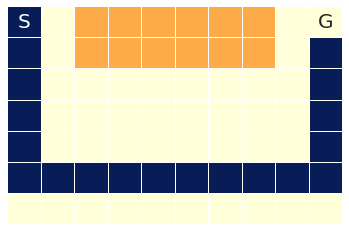

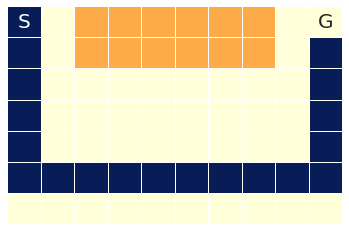

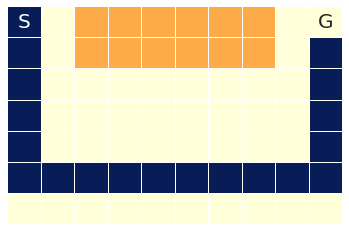

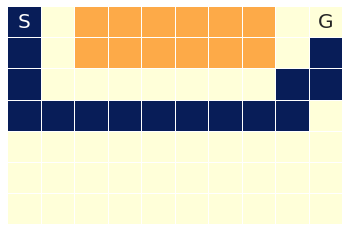

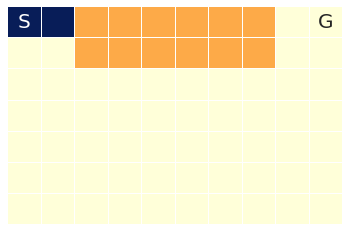

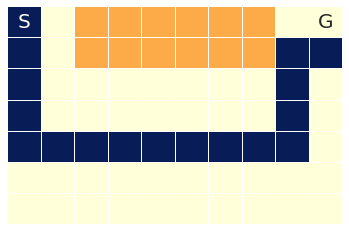

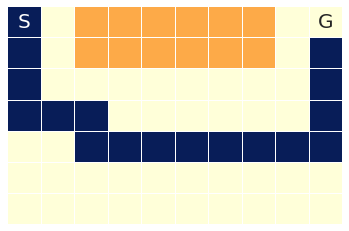

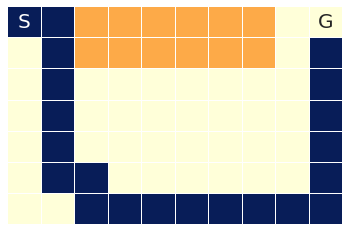

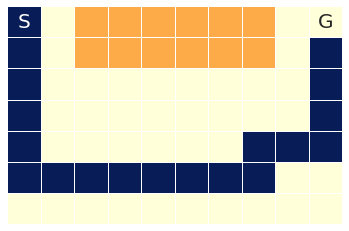

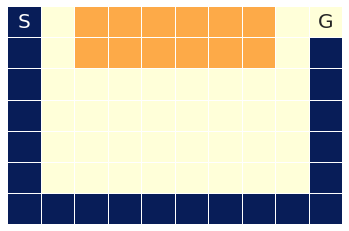

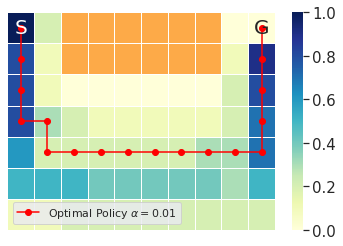

In [161]:
width=12-2
height=9-2
final_map = np.zeros( (height, width) )
stoch = 0.1
budget = 100
alpha = 0.01
i = 2
path = '/home/mheuillet/Desktop/CvarAdversarialRL-main/results'
for seed in [1,2,3,4,5,6,7,8,9,10]:
    
    if budget == 1:
        with gzip.open( os.path.join(path, 'newfig_experiment2_{}_{}_0.7_{}_0_5m_1.pkl.gz'.format(budget, stoch, seed ) )  ,'rb') as f:
            map = pkl.load(f)
                
    else:
        with gzip.open( os.path.join(path, 'newfig_experiment3_{}_{}_0.7_{}_0_5m_1.pkl.gz'.format(budget, stoch, seed ) )  ,'rb') as f:
            map = pkl.load(f)
            
    map2 = map.copy()
    map2[map2>0]=1
            
    annotations = pd.DataFrame( np.zeros( map.T.shape)  )
    annotations[ annotations == 0 ] = ' '
    annotations = annotations.astype(str)  
    annotations.loc[0,9] = 'G'
    annotations.loc[0,0] = 'S'

    final_map = final_map + map2.T

    fig, ax = plt.subplots()
    
    fig = sns.heatmap( nans( map2.T) , linewidths=.5,  ax=ax,  cbar=False, cmap="YlGnBu", annot=annotations, fmt="s",annot_kws={"fontsize":20} )
    fig.set_facecolor('#fdaa48')
    fig.set(xticklabels=[], yticklabels=[]) 
    

    plt.savefig('/home/mheuillet/Desktop/final_figures/seed_{}_{}.pdf'.format(seed,budget), format="pdf", dpi=1200, bbox_inches='tight' )
    
fig, ax = plt.subplots()
annotations = pd.DataFrame(np.zeros( final_map.shape)  )
annotations = annotations.where( annotations != 0 , '')
annotations = annotations.astype(str)  
annotations.loc[0,9] = 'G'
annotations.loc[0,0] = 'S'
fig = sns.heatmap( nans(final_map/10 ), linewidths=.5,  cmap="YlGnBu" , vmin =0, vmax=1,annot=annotations, annot_kws={"fontsize":20}, fmt="s" ) 
fig.plot( paths[i][0] + 0.5, paths[i][1] + 0.5, 'o-', color='red', label=r'Optimal Policy $\alpha = {}$'.format(alpha))
fig.set(xticklabels=[], yticklabels=[]) 
fig.legend()
fig.set_facecolor('#fdaa48') 
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)

plt.savefig('/home/mheuillet/Desktop/final_figures/averaged_seed_{}.pdf'.format(budget), format="pdf", dpi=1200, bbox_inches='tight')

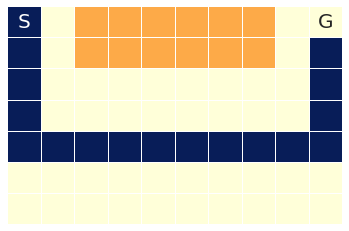

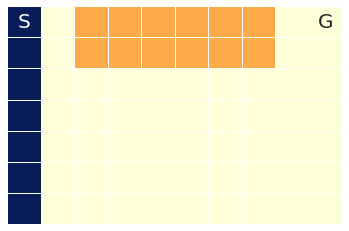

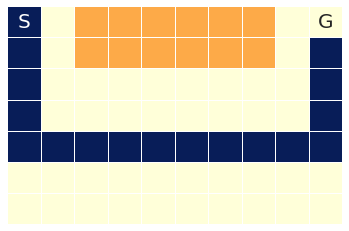

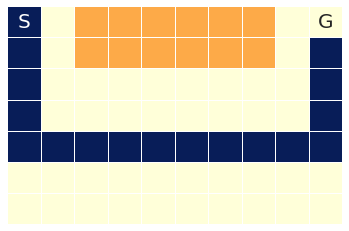

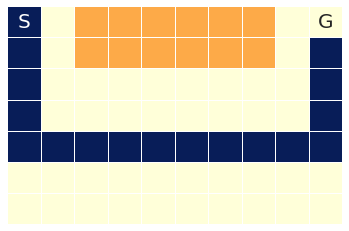

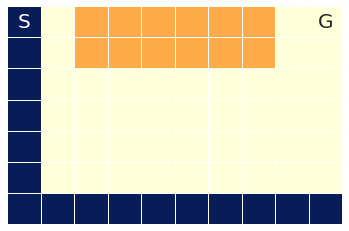

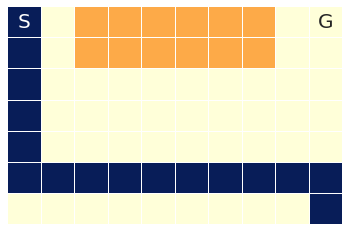

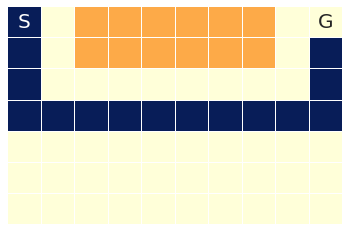

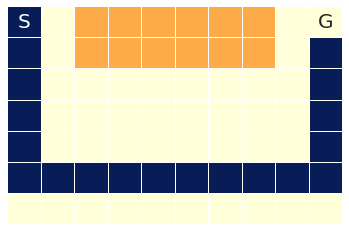

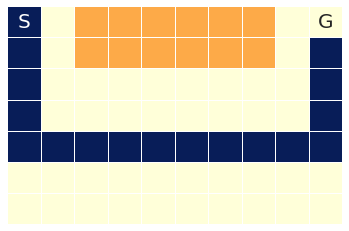

In [149]:
def vec2map(data):
    data = np.array(data, dtype=int)
    map = np.zeros( (7,10) )
    for x in data:
        map[x[1],x[0] ] +=1
    return map


width=12-2
height=9-2
final_map = np.zeros( (height, width) )
stoch = 0.1
budget = 100
alpha = 0.01
i = 2
nb_steps = 0
for seed in [0,1,2,3,4,5,6,7,8,9]:
    
    path = '/home/mheuillet/Desktop/det_traj_iqn_10M/task=LavaGrid-old--lr=0.001--alpha={}--hidden_sizes=[32, 32]--use_per=False--epoch=100--seed={}'.format(alpha,seed) 
    data = np.load( os.path.join(path, 'trajs.npy') )
    nb_steps += len(data)
    map = vec2map(data)
    map2 = map.copy()
    map2[map2>0]=1
        
    annotations = pd.DataFrame( np.zeros( map.shape)  )
    annotations[ annotations == 0 ] = ' '
    annotations = annotations.astype(str)  
    annotations.loc[0,9] = 'G'
    annotations.loc[0,0] = 'S'

    final_map = final_map + map2

    fig, ax = plt.subplots()
    
    from matplotlib.colors import LogNorm
    fig = sns.heatmap( nans( map2) , linewidths=.5,  ax=ax, cbar=False, cmap="YlGnBu",  annot=annotations, fmt="s",annot_kws={"fontsize":20} )
    fig.set_facecolor('#fdaa48')
    fig.set(xticklabels=[], yticklabels=[]) 
    

    plt.savefig('/home/mheuillet/Desktop/final_figures/IQNseed_{}_{}.pdf'.format(seed,budget), format="pdf", dpi=1200, bbox_inches='tight' )
    
# fig, ax = plt.subplots()
# annotations = pd.DataFrame(np.zeros( final_map.shape)  )
# annotations = annotations.where( annotations != 0 , '')
# annotations = annotations.astype(str)  
# annotations.loc[0,9] = 'G'
# annotations.loc[0,0] = 'S'
# fig = sns.heatmap( nans(final_map/10), linewidths=.5,  cmap="YlGnBu" ,vmin = 0, vmax = 1,cbar_kws={"format": formatter}, annot=annotations, annot_kws={"fontsize":20}, fmt="s" ) 
# fig.plot( paths[i][0] + 0.5, paths[i][1] + 0.5, 'o-', color='red', label=r'Optimal Policy $\alpha = {}$'.format(alpha))
# fig.set(xticklabels=[], yticklabels=[]) 
# fig.legend()
# fig.set_facecolor('#fdaa48') ##fdaa48
# cbar = ax.collections[0].colorbar
# cbar.ax.tick_params(labelsize=15)

# plt.savefig('/home/mheuillet/Desktop/final_figures/IQMaveraged_seed_{}.pdf'.format(budget), format="pdf", dpi=1200, bbox_inches='tight')

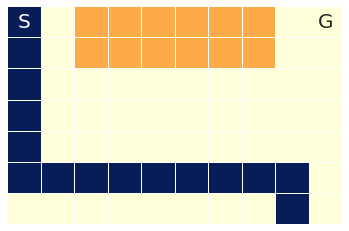

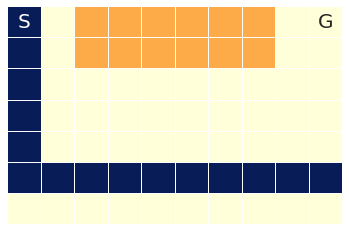

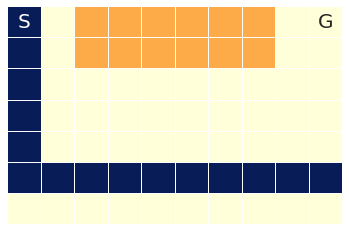

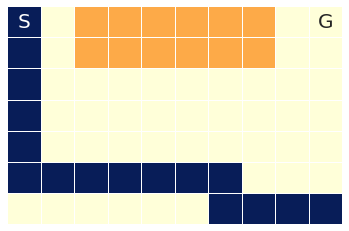

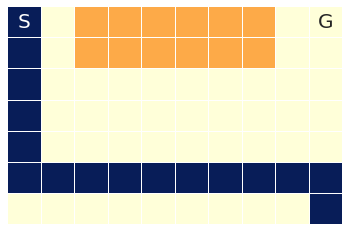

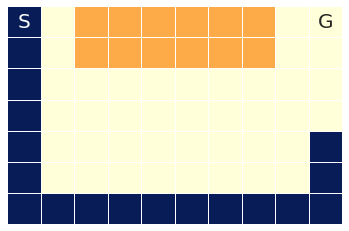

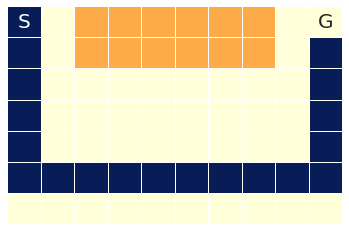

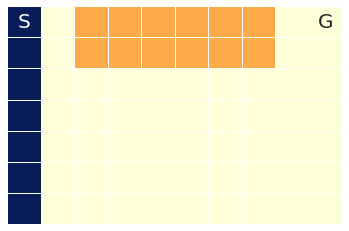

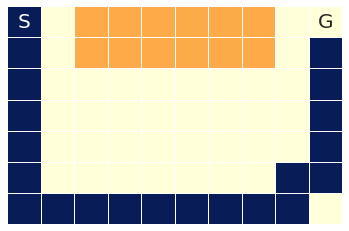

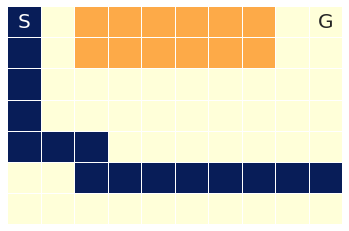

In [140]:
def vec2map(data):
    data = np.array(data, dtype=int)
    map = np.zeros( (7,10) )
    for x in data:
        map[x[1],x[0] ] +=1
    return map


width=12-2
height=9-2
final_map = np.zeros( (height, width) )
stoch = 0.1
budget = 100
alpha = 0.01
i = 2
nb_steps = 0
for seed in [0,1,2,3,4,5,6,7,8,9]:
    
    path = '/home/mheuillet/Desktop/deterministic_traj/lr=0.002--alpha={}--seed={}'.format(alpha,seed) 
    data = np.load( os.path.join(path, 'trajs.npy') )
    nb_steps += len(data)
    map = vec2map(data) 
    map2 = map.copy()
    map2[map2>0]=1
        
    annotations = pd.DataFrame( np.zeros( map.shape)  )
    annotations[ annotations == 0 ] = ' '
    annotations = annotations.astype(str)  
    annotations.loc[0,9] = 'G'
    annotations.loc[0,0] = 'S'

    final_map = final_map + map2

    fig, ax = plt.subplots()
    
    from matplotlib.colors import LogNorm
    fig = sns.heatmap( nans( map2) , linewidths=.5,  ax=ax, cmap="YlGnBu", cbar=False,  annot=annotations, fmt="s",annot_kws={"fontsize":20} )
    fig.set_facecolor('#fdaa48')

    fig.set(xticklabels=[], yticklabels=[]) 
    

    plt.savefig('/home/mheuillet/Desktop/final_figures/IQN_5M_seed_{}_{}.pdf'.format(seed,budget),  format="pdf", dpi=1200, bbox_inches='tight' )
    
# fig, ax = plt.subplots()
# annotations = pd.DataFrame(np.zeros( final_map.shape)  )
# annotations = annotations.where( annotations != 0 , '')
# annotations = annotations.astype(str)  
# annotations.loc[0,9] = 'G'
# annotations.loc[0,0] = 'S'
# fig = sns.heatmap( nans(final_map/10), linewidths=.5,  cmap="YlGnBu" ,vmin = 0, vmax = 1,cbar_kws={"format": formatter}, annot=annotations, annot_kws={"fontsize":20}, fmt="s" ) 
# fig.plot( paths[i][0] + 0.5, paths[i][1] + 0.5, 'o-', color='red', label=r'Optimal Policy $\alpha = {}$'.format(alpha))
# fig.set(xticklabels=[], yticklabels=[]) 
# fig.legend()
# fig.set_facecolor('#fdaa48') ##fdaa48
# cbar = ax.collections[0].colorbar
# cbar.ax.tick_params(labelsize=15)

# plt.savefig('/home/mheuillet/Desktop/final_figures/IQN_5M_averaged_seed_{}.pdf'.format(budget), format="pdf", dpi=1200, bbox_inches='tight')